#RQ1 - Mobile App Popularity Classification

### Preprocessing
1. Acquire Dataset
2. Import Appropriate Python Libraries
3. Import Dataset
4. Handle Dataset Issues
(Handle Missing Values, Encode Categorical Data)
5. Split Dataset into train/test sets
6. Feature Scaling (standardize/normalise)

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re 
import string
import nltk
from sklearn import preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance


import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Will need to change to submitted rq1_dataset.csv
rq1 = pd.read_csv('/content/drive/MyDrive/IS424 Data Mining and Business Analytics G2/RQ Dataset/rq1_dataset.csv')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [5]:
print(rq1.info())
rq1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   App                            816 non-null    object 
 1   Category                       816 non-null    object 
 2   Rating                         816 non-null    float64
 3   Reviews                        816 non-null    int64  
 4   Size                           816 non-null    float64
 5   Installs                       816 non-null    int64  
 6   Type                           816 non-null    object 
 7   Price                          816 non-null    float64
 8   Content Rating                 816 non-null    object 
 9   Genres                         816 non-null    object 
 10  Last Updated                   816 non-null    object 
 11  Current Ver                    816 non-null    object 
 12  Android Ver                    816 non-null    obj

App            Category  \
0                             10 Best Foods for You  HEALTH_AND_FITNESS   
1                                              11st            SHOPPING   
2                        1800 Contacts - Lens Store             MEDICAL   
3                   1LINE – One Line with One Touch                GAME   
4  2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif     PERSONALIZATION   

   Rating  Reviews          Size  Installs  Type  Price Content Rating  \
0     4.0     2490  3.800000e+06    500000  Free    0.0   Everyone 10+   
1     3.8    48732  2.000000e+07  10000000  Free    0.0       Everyone   
2     4.7    23160  2.600000e+07   1000000  Free    0.0       Everyone   
3     4.6   214878  1.000000e+07  10000000  Free    0.0       Everyone   
4     4.2   115773  2.545835e+07  10000000  Free    0.0       Everyone   

             Genres Last Updated         Current Ver Android Ver  \
0  Health & Fitness   2017-02-17                 1.9       2.3.3   
1          Shopping   2018-07-31               7.8.1         4.0   
2           Medical   2018-07-27               7.4.1         5.0   
3             Board   2018-08-03               2.0.4         4.1   
4   Personalization   2018-05-22  Varies with device         4.1   

   num_comment_available  num_days_before_latest_update  genre_saturation  \
0                    194                            535                 3   
1                     39                              6                13   
2                     80                             10                 7   
3                     38                              3                21   
4                     32                             76                 6   

   category_saturation  num_pos_comment  num_neg_comment  num_words_in_name  \
0                    5              144                6                  5   
1                   16               15                4                  1   
2                    9               54                2                  5   
3                    1               16                7                  7   
4                    8               20                1                  6   

   num_chars_in_name  number_in_name  punctuation_in_name  num_genre  \
0                 21            True                False          1   
1                  4            True                False          1   
2                 26            True                 True          1   
3                 31            True                False          1   
4                 48            True                 True          1   

   install_category  score  popular  
0                 1    5.0        0  
1                 4    7.8        1  
2                 2    6.7        0  
3                 4    8.6        1  
4                 4    8.2        1

In [6]:
rq1 = rq1[['Category','Reviews','Size','Content Rating','num_days_before_latest_update',
           'genre_saturation','category_saturation','num_chars_in_name','number_in_name',
           'punctuation_in_name','popular']]

In [7]:
for column in rq1.columns:
    if rq1[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        rq1[column] = le.fit_transform(rq1[column])
        #print("Column Name:", column)
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        for key,value in le_name_mapping.items(): 
            print(key+":",value)
        print("\n"*2)
rq1.head()

ART_AND_DESIGN: 0
AUTO_AND_VEHICLES: 1
BEAUTY: 2
BOOKS_AND_REFERENCE: 3
BUSINESS: 4
COMICS: 5
COMMUNICATION: 6
DATING: 7
EDUCATION: 8
ENTERTAINMENT: 9
EVENTS: 10
FAMILY: 11
FINANCE: 12
FOOD_AND_DRINK: 13
GAME: 14
HEALTH_AND_FITNESS: 15
HOUSE_AND_HOME: 16
LIBRARIES_AND_DEMO: 17
LIFESTYLE: 18
MAPS_AND_NAVIGATION: 19
MEDICAL: 20
NEWS_AND_MAGAZINES: 21
PARENTING: 22
PERSONALIZATION: 23
PHOTOGRAPHY: 24
PRODUCTIVITY: 25
SHOPPING: 26
SOCIAL: 27
SPORTS: 28
TOOLS: 29
TRAVEL_AND_LOCAL: 30
VIDEO_PLAYERS: 31
WEATHER: 32



Adults only 18+: 0
Everyone: 1
Everyone 10+: 2
Mature 17+: 3
Teen: 4





Category  Reviews          Size  Content Rating  \
0        15     2490  3.800000e+06               2   
1        26    48732  2.000000e+07               1   
2        20    23160  2.600000e+07               1   
3        14   214878  1.000000e+07               1   
4        23   115773  2.545835e+07               1   

   num_days_before_latest_update  genre_saturation  category_saturation  \
0                            535                 3                    5   
1                              6                13                   16   
2                             10                 7                    9   
3                              3                21                    1   
4                             76                 6                    8   

   num_chars_in_name  number_in_name  punctuation_in_name  popular  
0                 21            True                False        0  
1                  4            True                False        1  
2                 26            True                 True        0  
3                 31            True                False        1  
4                 48            True                 True        1

In [8]:
rq1.describe()

Category       Reviews          Size  Content Rating  \
count  816.000000  8.160000e+02  8.160000e+02      816.000000   
mean    17.056373  7.113919e+05  2.545835e+07        1.469363   
std      8.455253  3.640515e+06  2.016558e+07        1.003817   
min      0.000000  1.140000e+02  8.500000e+03        0.000000   
25%     11.000000  7.777750e+03  1.075000e+07        1.000000   
50%     15.000000  4.065050e+04  2.545835e+07        1.000000   
75%     25.000000  1.983450e+05  2.545835e+07        1.000000   
max     32.000000  7.815831e+07  9.900000e+07        4.000000   

       num_days_before_latest_update  genre_saturation  category_saturation  \
count                     816.000000        816.000000           816.000000   
mean                      142.876225          9.908088             9.453431   
std                       309.599172          6.257668             6.463511   
min                         0.000000          1.000000             1.000000   
25%                         7.000000          5.000000             4.000000   
50%                        25.000000          9.000000             9.000000   
75%                        94.250000         14.000000            14.000000   
max                      2595.000000         26.000000            26.000000   

       num_chars_in_name     popular  
count         816.000000  816.000000  
mean           24.208333    0.501225  
std            12.017808    0.500305  
min             3.000000    0.000000  
25%            15.000000    0.000000  
50%            24.000000    1.000000  
75%            30.000000    1.000000  
max            50.000000    1.000000

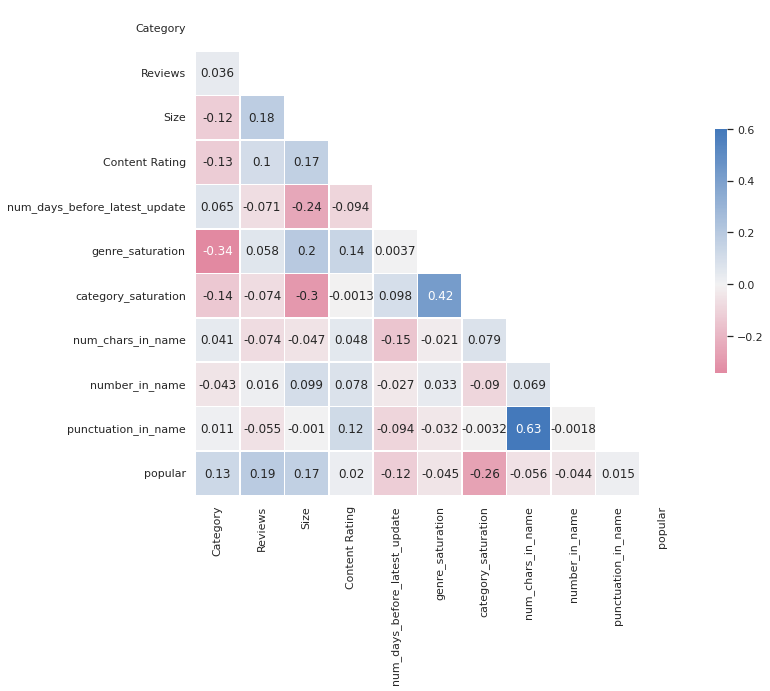

In [9]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = rq1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1, 250, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

### Tran-Test Split

In [10]:
# features

X = rq1.drop(columns=["popular"])

# target
y = rq1["popular"]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [13]:
cols=X_train.columns.tolist()

In [14]:
#Feature Scaling for training set X_train and X_test separately
from sklearn.preprocessing import MinMaxScaler
standard_X = MinMaxScaler()
X_train = standard_X.fit_transform(X_train) 
X_test = standard_X.fit_transform(X_test)

In [15]:
X_test = pd.DataFrame(X_test, columns=[cols])
X_train = pd.DataFrame(X_train, columns=[cols])

# Model Training

### Initialisation

In [16]:
import timeit
import pickle
import sys
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
from sklearn.exceptions import NotFittedError

## Set fixed ranom seeds to get reproducible results
seed_val = 424

feature_names = X_train.columns.tolist()

from sklearn import metrics
primary_eval_metric = metrics.f1_score

confusion_lbs = ['Non-Popular', 'Popular']

### Utility Functions (Reporting etc.)

In [17]:
def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
    plt.close()
    
    return fig

In [18]:
def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Receiver Operating Characteristic (ROC) curve 
        Set `compare=True` to use this function to compare classifiers. """
    
    fpr, tpr, thresh = roc_curve(y_true, y_probs, drop_intermediate=False)
    auc = round(roc_auc_score(y_true, y_probs), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis,
                 estimator=None, label=label)
    
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig

In [19]:
def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Precision-Recall curve.
        Set `compare=True` to use this function to compare classifiers. """
    
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    
    if compare:
        sns.lineplot(r, p, estimator=None,
                     ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')
    else:
        sns.lineplot(thresh, p, estimator=None,
                     label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')

        axis_twin = axis.twinx()
        sns.lineplot(thresh, r, estimator=None,
                     color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bbox_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig

In [20]:
def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig

In [21]:
def train_clf(clf, x_train, y_train, sample_weight=None, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(x_train)
        
        # For neural nets
        y_pred_train = np.where(y_pred_train.flatten() > 0.5, 1, 0)
        
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(x_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(x_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(x_train)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time

In [22]:
def model_memory_size(clf):
    return sys.getsizeof(pickle.dumps(clf))

In [23]:
def report(clf, x_train, y_train, x_test, y_test, display_scores=[],
           sample_weight=None, refit=False, importance_plot=False,
           confusion_labels=None, feature_labels=None, neural_net=False,
           verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, x_train, y_train,
                                      sample_weight=sample_weight,
                                      refit=refit)
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(x_test)
    end = timeit.default_timer()
    test_time = end - start
    
    # For neural nets
    if neural_net:
        y_probs = np.copy(test_predictions)
        test_predictions = np.where(test_predictions.flatten() > 0.5, 1, 0)
    else:
        y_probs = clf.predict_proba(x_test)[:, 1]
    
    test_acc = accuracy_score(y_test, test_predictions)
    roc_auc = roc_auc_score(y_test, y_probs)
        
    ## Additional scores
    scores_dict = dict()
    for func in display_scores:
        scores_dict[func.__name__] = [func(y_train, train_predictions),
                                      func(y_test, test_predictions)]
        
    ## Model Memory
    model_mem = None
    if not neural_net:
        model_mem = round(model_memory_size(clf) / 1024, 2)
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {x_train.shape[0]} samples")
    print(f" Test Size: {x_test.shape[0]} samples")
    print("---------------------------------------------")
    print(f"Training Time: {round(train_time, 3)} seconds")
    print(f" Testing Time: {round(test_time, 3)} seconds")
    print("---------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("---------------------------------------------")
    
    if display_scores:
        for k, v in scores_dict.items():
            score_name = ' '.join(map(lambda x: x.title(), k.split('_')))
            print(f'Train {score_name}: ', v[0])
            print(f' Test {score_name}: ', v[1])
            print()
        print("---------------------------------------------")
    
    print(" Area Under ROC (test): ", roc_auc)
    print("---------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))
    
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions),
                               labels=confusion_labels))
        print("\n=======================================> PLOTS <=========================================")


        ## Variable importance plot
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        roc_axes = axes[0, 0]
        pr_axes = axes[0, 1]
        importances = None

        if importance_plot:
            if not feature_labels:
                raise RuntimeError("'feature_labels' argument not passed "
                                   "when 'importance_plot' is True")

            try:
                importances = pd.Series(clf.feature_importances_,
                                        index=feature_labels) \
                                .sort_values(ascending=False)
            except AttributeError:
                try:
                    importances = pd.Series(clf.coef_.ravel(),
                                            index=feature_labels) \
                                    .sort_values(ascending=False)
                except AttributeError:
                    pass

            if importances is not None:
                # Modifying grid
                grid_spec = axes[0, 0].get_gridspec()
                for ax in axes[:, 0]:
                    ax.remove()   # remove first column axes
                large_axs = fig.add_subplot(grid_spec[0:, 0])

                # Plot importance curve
                feature_importance_plot(importances=importances.values,
                                        feature_labels=importances.index,
                                        ax=large_axs)
                large_axs.axvline(x=0)

                # Axis for ROC and PR curve
                roc_axes = axes[0, 1]
                pr_axes = axes[1, 1]
            else:
                # remove second row axes
                for ax in axes[1, :]:
                    ax.remove()
        else:
            # remove second row axes
            for ax in axes[1, :]:
                ax.remove()


        ## ROC and Precision-Recall curves
        clf_name = clf.__class__.__name__
        roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        fig.subplots_adjust(wspace=5)
        fig.tight_layout()
        display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, accuracy=[train_acc, test_acc], **scores_dict,
                train_time=train_time, train_predictions=train_predictions,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf, dump

In [24]:
def compare_models(y_test=None, clf_reports=[], labels=[], score='accuracy'):
    """ Compare evaluation metrics for the True Positive class [1] of 
        binary classifiers passed in the argument and plot ROC and PR curves.
        
        Arguments:
        ---------
        y_test: to plot ROC and Precision-Recall curves
         score: is the name corresponding to the sklearn metrics
        
        Returns:
        -------
        compare_table: pandas DataFrame containing evaluated metrics
                  fig: `matplotlib` figure object with ROC and PR curves """

    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train ' + score, 'Test ' + score, 'Overfitting', 'Accuracy', 'ROC Area',
             'Precision', 'Recall', 'F1-score', 'Support']
    # index = ['Train ' + score, 'Test ' + score, 'Accuracy', 'ROC Area',
    #          'Precision', 'Recall']
    # Remove 'Overfitting', 'F1-score', 'Support'
    for i in range(len(clf_reports)):
        scores = [round(i, 3) for i in clf_reports[i][score]]
        
        roc_auc = clf_reports[i]['roc_auc']
        test_acc = clf_reports[i]['accuracy'][1]
        
        # Get metrics of True Positive class from sklearn classification_report
        true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        table[clf_names[i]] = scores + [scores[1] < scores[0], test_acc, roc_auc] + \
                              true_positive_metrics
    
    table = pd.DataFrame(data=table, index=index)
    
    
    ## Compare Plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # ROC and Precision-Recall
    for i in range(len(clf_reports)):
        clf_probs = clf_reports[i]['test_probs']
        roc_plot(y_test, clf_probs, label=clf_names[i],
                 compare=True, ax=axes[0])
        precision_recall_plot(y_test, clf_probs, label=clf_names[i],
                              compare=True, ax=axes[1])
    # Plot No-Info classifier
    axes[0].plot([0,1], [0,1], linestyle='--', color='green')
        
    fig.tight_layout()
    plt.close()
    
    return table.T, fig

In [25]:
!pip install shap
import shap

     |████████████████████████████████| 371 kB 6.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509229 sha256=9476899612f945dc18468392a21a8cda5f24c6882ec4f1eb9b3b3ed66b0452d9
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


##Naive Bayes

GaussianNB(priors=None, var_smoothing=1e-09)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0.008 seconds
 Testing Time: 0.001 seconds
---------------------------------------------
Train Accuracy:  0.843558282208589
 Test Accuracy:  0.7439024390243902
---------------------------------------------
Train F1 Score:  0.8197879858657243
 Test F1 Score:  0.671875

---------------------------------------------
 Area Under ROC (test):  0.8385703648548027
---------------------------------------------
Model Memory Size: 0.99 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

 Non-Popular       0.65      1.00      0.79        79
     Popular       1.00      0.51      0.67        85

    accuracy                           0.74       164
   macro avg  

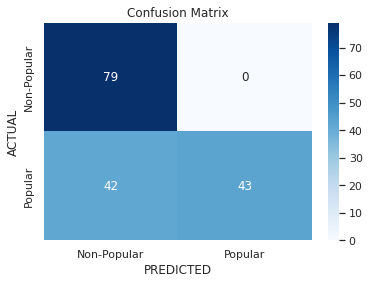


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


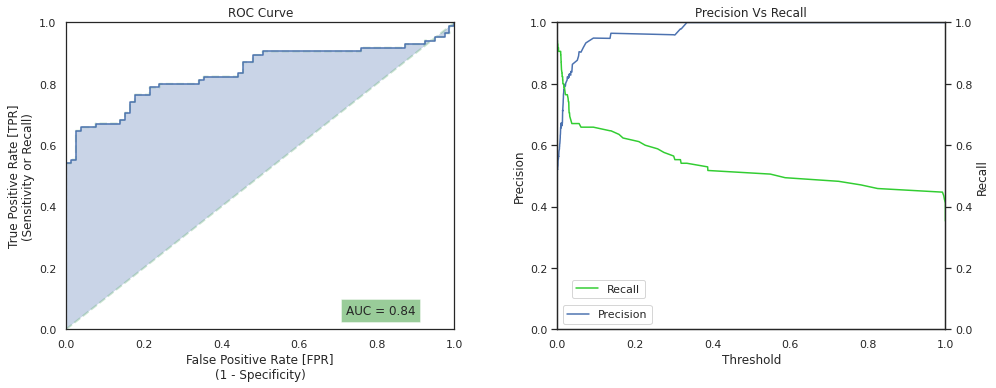

In [26]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

nb_clf, nb_report = report(nb_clf, X_train, y_train,
                           X_test, y_test,
                           display_scores=[primary_eval_metric],
                           refit=True,
                           importance_plot=True,
                           feature_labels=feature_names,
                           confusion_labels=confusion_lbs)

In [ ]:
# Naive Bayes - SHAP Attempt
explainer = shap.KernelExplainer(nb_clf.predict, X_train)
shap_values = explainer.shap_values(X_test)

Using 652 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/164 [00:00<?, ?it/s]

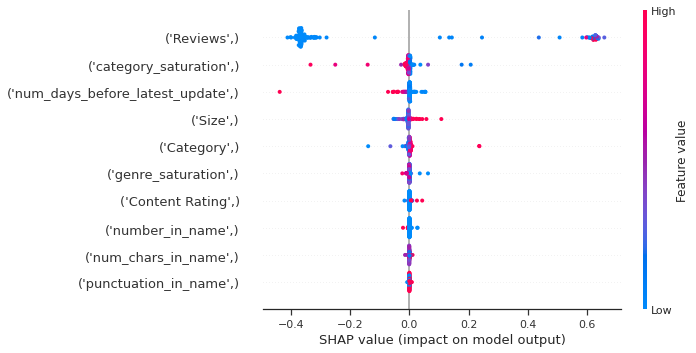

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = nb_clf
thismodel_name = "Naive Bayes Classifier"

# fit
thismodel.fit(X_train, y_train)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

nb_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

nb_f1

Naive Bayes Classifier
train f1 score                 0.819788
test f1 score                  0.671875
train_test diff                0.147913
accuracy                       0.743902
precision                      0.505882
recall                         1.000000

##Logistic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0.018 seconds
 Testing Time: 0.001 seconds
---------------------------------------------
Train Accuracy:  0.6702453987730062
 Test Accuracy:  0.6280487804878049
---------------------------------------------
Train F1 Score:  0.667697063369397
 Test F1 Score:  0.6211180124223602

---------------------------------------------
 Area Under ROC (test):  0.6583767684288906
---------------------------------------------
Model Memory Size: 0.92 kB

=============================> 

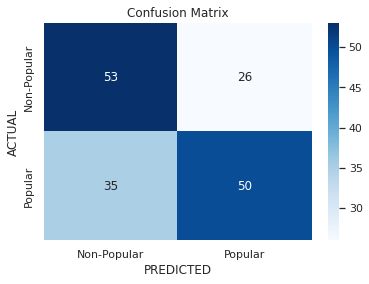


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


In [27]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit, logit_report = report(logit, X_train, y_train,
                                X_test, y_test,
                                display_scores=[primary_eval_metric],
                                importance_plot=True,
                                feature_labels=feature_names,
                                confusion_labels=confusion_lbs)

In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = logit
thismodel_name = "Logistic Regression"

# fit
thismodel.fit(X_train, y_train)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

logit_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

logit_f1

Logistic Regression
train f1 score              0.667697
test f1 score               0.621118
train_test diff             0.046579
accuracy                    0.628049
precision                   0.588235
recall                      0.657895

In [29]:
log_reg_explainer = shap.LinearExplainer(logit, X_test)
log_reg_shap_values = log_reg_explainer.shap_values(X_test)

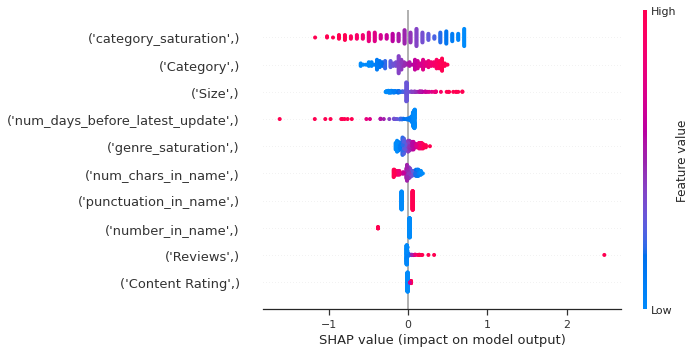

In [30]:
shap.summary_plot(log_reg_shap_values, X_test)

##K-Nearest Neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='distance')

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0.005 seconds
 Testing Time: 0.106 seconds
---------------------------------------------
Train Accuracy:  1.0
 Test Accuracy:  0.6524390243902439
---------------------------------------------
Train F1 Score:  1.0
 Test F1 Score:  0.6850828729281768

---------------------------------------------
 Area Under ROC (test):  0.6880863737900225
---------------------------------------------
Model Memory Size: 119.27 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

 Non-Popular       0.66      0.57      0.61        79

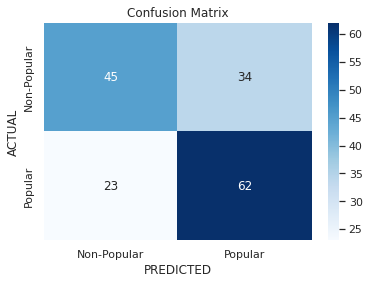


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           weights='distance', n_jobs=-1)

knn, knn_report = report(knn, X_train, y_train,
                         X_test, y_test,
                         display_scores=[primary_eval_metric],
                         importance_plot=True,
                         feature_labels=feature_names,
                         confusion_labels=confusion_lbs)

In [ ]:
# KNN - SHAP Attempt
explainer = shap.KernelExplainer(knn.predict, X_train)
knn_shap_values = explainer.shap_values(X_test)

Using 652 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/164 [00:00<?, ?it/s]

In [ ]:
shap.summary_plot(knn_shap_values, X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = knn
thismodel_name = "K-NN Classifier"

# fit
thismodel.fit(X_train, y_train)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

knn_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

knn_f1

K-NN Classifier
train f1 score          1.000000
test f1 score           0.685083
train_test diff         0.314917
accuracy                0.652439
precision               0.729412
recall                  0.645833

##Decision Tree

In [ ]:
#Mark's Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

#Decision tree with initial parameters
decision_tree = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=10, min_samples_leaf=5)   

# Fit and produce decision_tree report
decision_tree, decision_tree_report = report(decision_tree, X_train, y_train,
                                             X_test, y_test,
                                             display_scores=[primary_eval_metric],
                                             importance_plot=True,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0.011 seconds
 Testing Time: 0.001 seconds
---------------------------------------------
Train Accuracy:  0.9309815950920245
 Test Accuracy:  0.7987804878048781
---------------------------------------------
Train F1 Score:  0.9297971918876755
 Test F1 Score:  0.784313725490196

---------------------------------------------
 Area Under ROC (test):  0.9035740878629933
--------


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


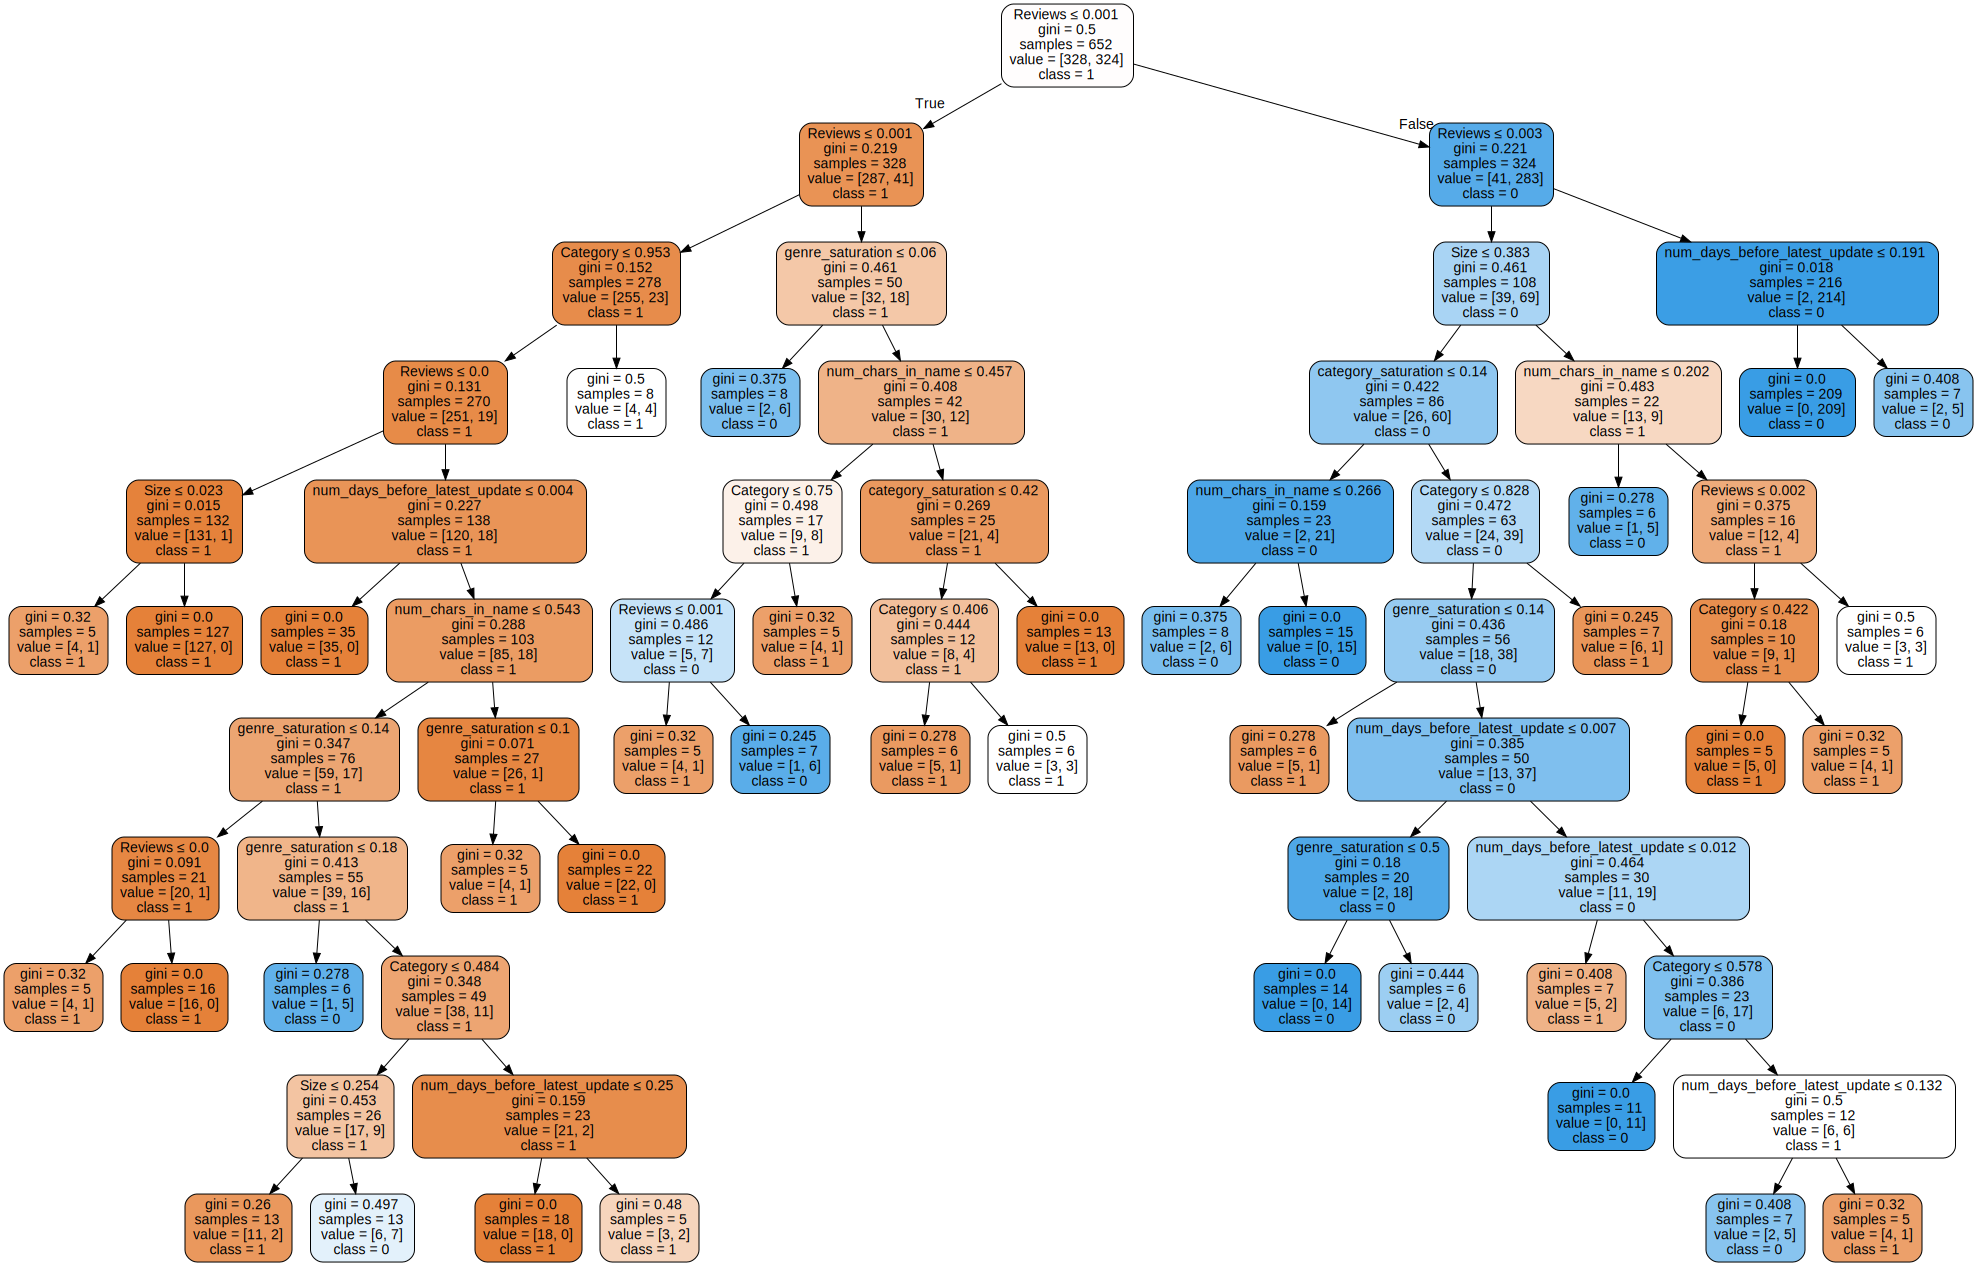

In [ ]:
#Display Initial Decision Tree
from sklearn import tree
import graphviz

target = ["1","0"]

dot_data = tree.export_graphviz(decision_tree,
                                out_file=None, 
                      feature_names=cols,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

In [ ]:
#Search for best parameters
params = {'min_samples_leaf': range(1, 20)
        ,'min_samples_split': range(1,20)
         ,'criterion':['gini','entropy']
         ,'max_depth': range(5,10)}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, verbose=1, cv=10,n_jobs=-1)
grid_search_cv.fit(X_train,y_train)

Fitting 10 folds for each of 3610 candidates, totalling 36100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 5322 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 13322 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 24522 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 36100 out of 36100 | elapsed:  2.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=19, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0 seconds
 Testing Time: 0.003 seconds
---------------------------------------------
Train Accuracy:  0.8895705521472392
 Test Accuracy:  0.8109756097560976
---------------------------------------------
Train F1 Score:  0.8846153846153846
 Test F1 Score:  0.7891156462585035

---------------------------------------------
 Area Under ROC (test):  0.9149664929262845
-----------

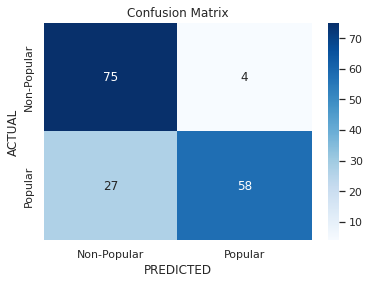


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


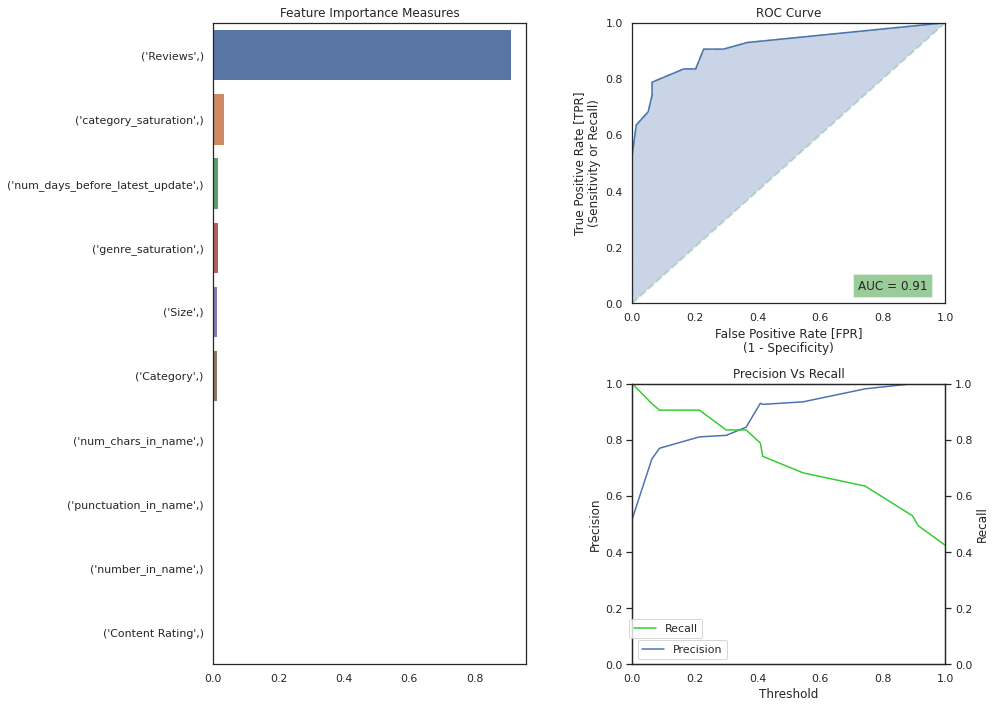

In [ ]:
#Decision tree with best parameters
decision_tree2 = grid_search_cv.best_estimator_
# clf_model_new = DecisionTreeClassifier(criterion="gini", random_state=41,max_depth=6, min_samples_leaf=3,min_samples_split=18)   

# Fit and produce decision_tree report 2
decision_tree2, decision_tree_report2 = report(decision_tree2, X_train, y_train,
                                             X_test, y_test,
                                             display_scores=[primary_eval_metric],
                                             importance_plot=True,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)

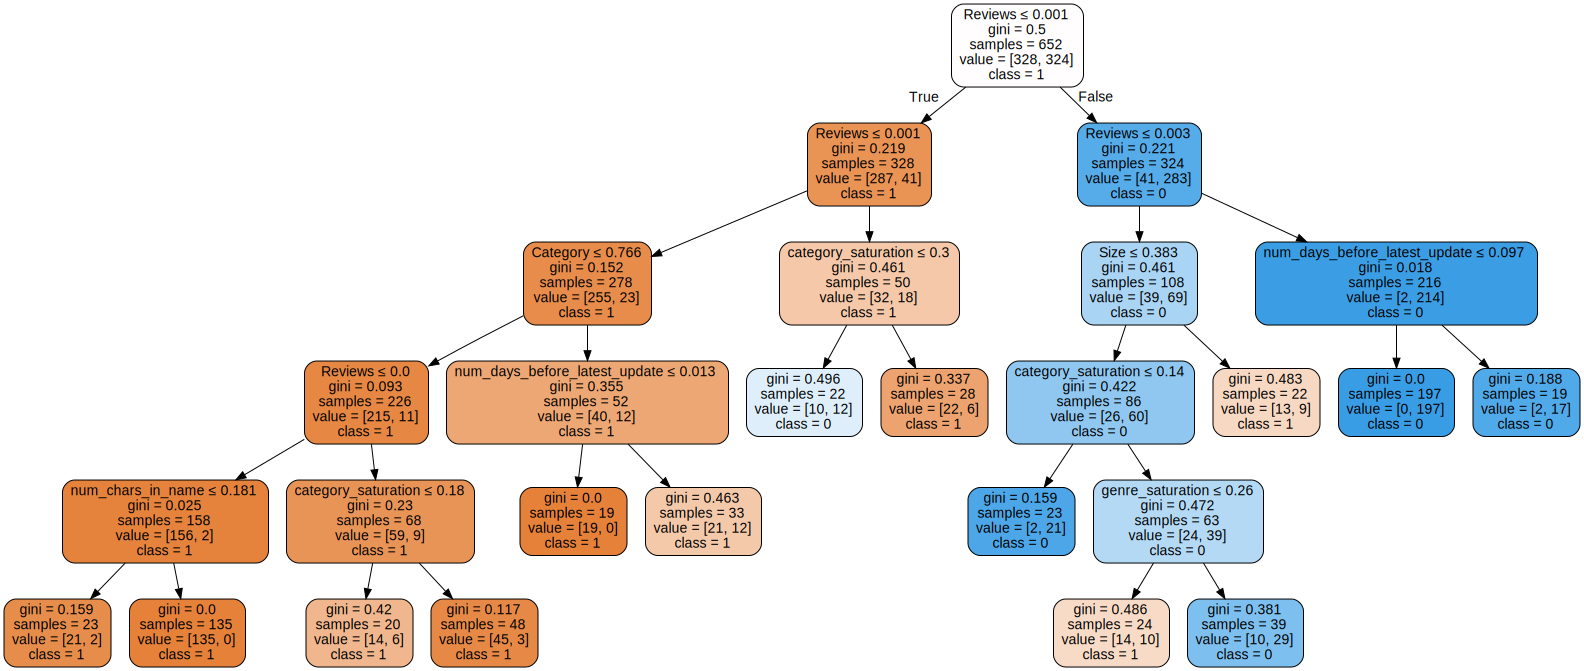

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(decision_tree2,
                                out_file=None, 
                      feature_names=cols,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

In [ ]:
# Decision Tree - SHAP Attempt
explainer = shap.TreeExplainer(decision_tree2, X_train)
decision_tree2_shap_values = explainer.shap_values(X_test)

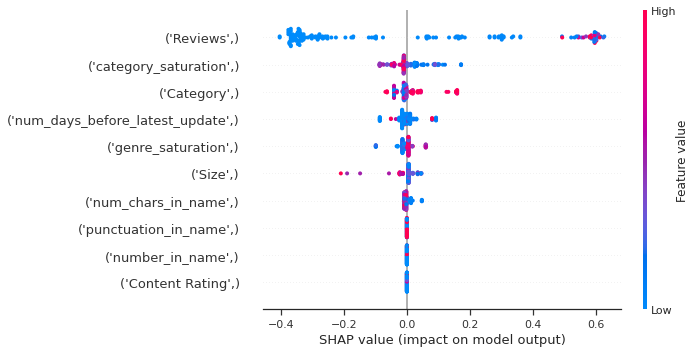

In [ ]:
shap.summary_plot(decision_tree2_shap_values[1], X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = decision_tree2
thismodel_name = "Decision Tree Classifier"

# fit
thismodel.fit(X_train, y_train)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

decision_tree2_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

decision_tree2_f1

Decision Tree Classifier
train f1 score                   0.884615
test f1 score                    0.789116
train_test diff                  0.095500
accuracy                         0.810976
precision                        0.682353
recall                           0.935484

##Decision Trees with Bagging

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=19,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
    

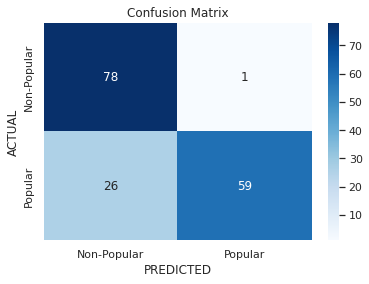


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


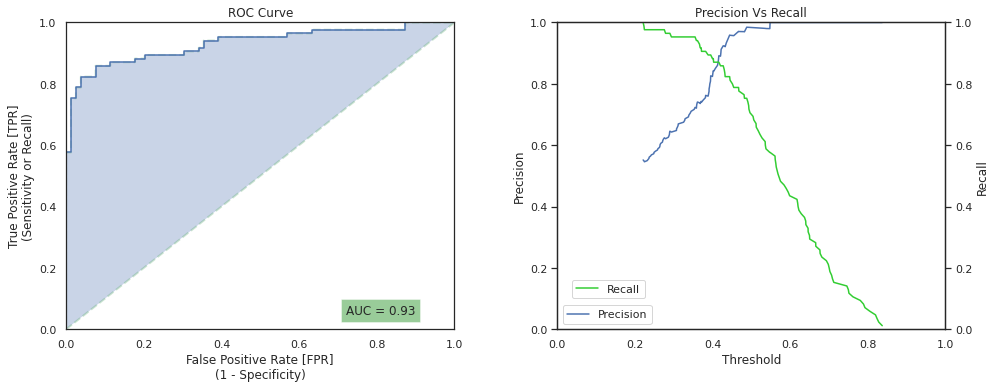

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_dtree = grid_search_cv.best_estimator_

bagging_clf = BaggingClassifier(base_estimator=bagging_dtree,
                                max_samples=0.745, n_estimators=100,
                                max_features=0.37,
                                n_jobs=-1, random_state=seed_val)

bagging_clf, bagging_clf_report = report(bagging_clf, X_train, y_train,
                                         X_test, y_test,
                                         display_scores=[primary_eval_metric],
                                         feature_labels=feature_names,
                                         confusion_labels=confusion_lbs)

In [ ]:
# Bagging - SHAP Attempt
explainer = shap.KernelExplainer(bagging_clf.predict, X_train)
bagging_clf_shap_values = explainer.shap_values(X_test)

Using 652 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/164 [00:00<?, ?it/s]

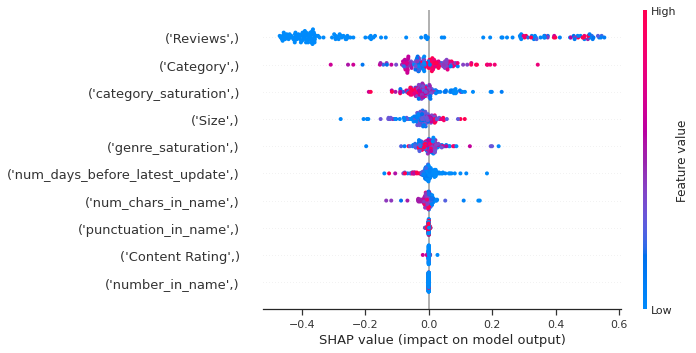

In [ ]:
shap.summary_plot(bagging_clf_shap_values, X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = bagging_clf
thismodel_name = "Decision Tree Classifier - Bagging"

# fit
thismodel.fit(X_train, y_train)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

bagging_clf_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

bagging_clf_f1

Decision Tree Classifier - Bagging
train f1 score                             0.890625
test f1 score                              0.813793
train_test diff                            0.076832
accuracy                                   0.835366
precision                                  0.694118
recall                                     0.983333

##Random Forests

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0.197 seconds
 Testing Time: 0.013 seconds
---------------------------------------------
Train Accuracy:  1.0
 Test Accuracy:  0.8475609756097561
---------------------------------------------
Train F1 Score:  1.0
 Test F1 Score:  0.8299319727891156

-----

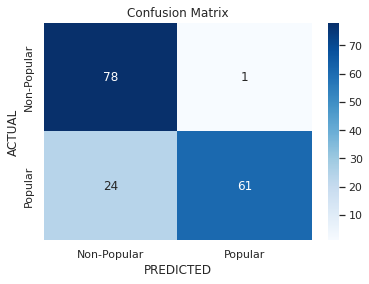


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


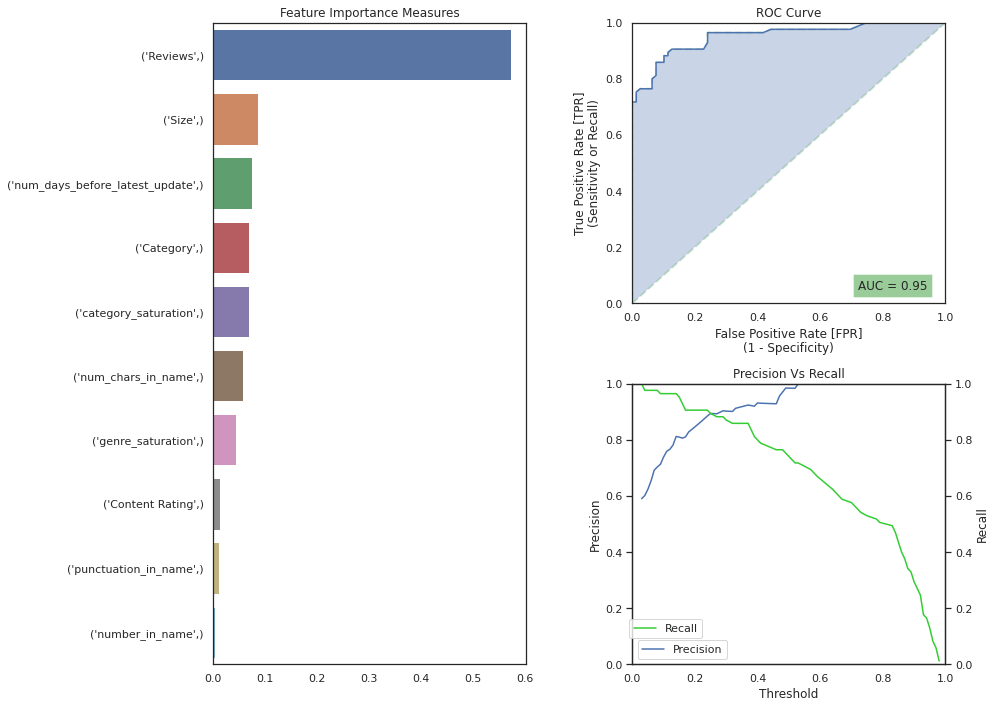

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=22,criterion="gini")
random_forest, random_forest_report = report(random_forest, X_train, y_train,
                                             X_test, y_test,
                                             display_scores=[primary_eval_metric],
                                             importance_plot=True,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)

In [ ]:
#Search for best parameters

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  8.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0 seconds
 Testing Time: 0.012 seconds
---------------------------------------------
Train Accuracy:  0.941717791411043
 Test Accuracy:  0.8536585365853658
---------------------------------------------
Train F1 Score:  0.9400630914826499
 Test F1 Score:  0.83


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


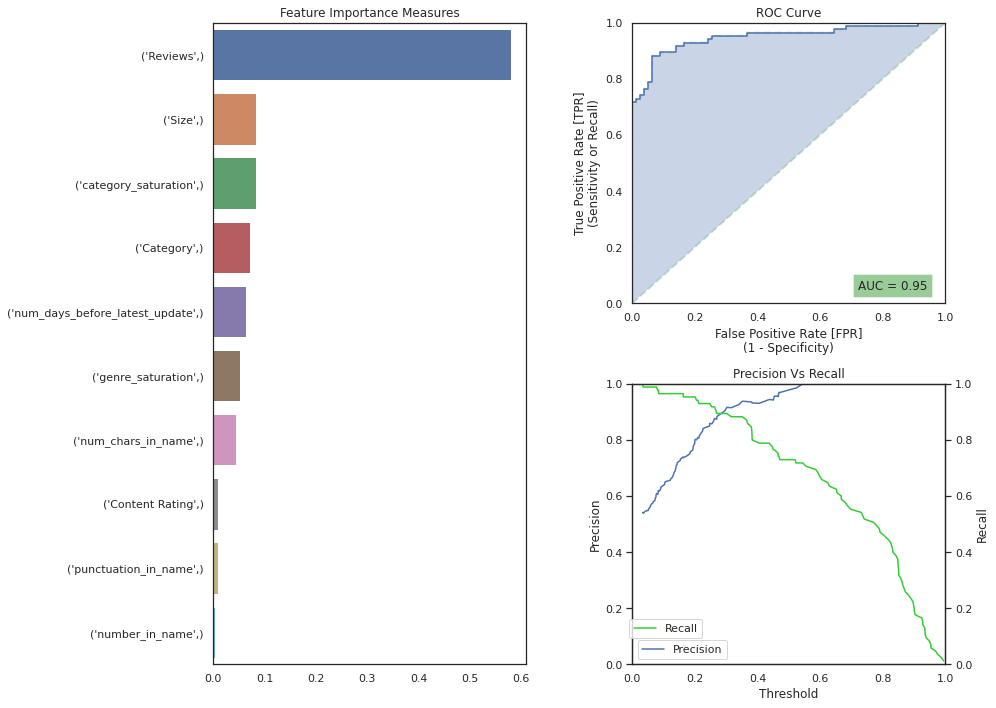

In [ ]:
random_forest2 = grid_search.best_estimator_
random_forest2, random_forest_report2 = report(random_forest2, X_train, y_train,
                                             X_test, y_test,
                                             display_scores=[primary_eval_metric],
                                             importance_plot=True,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)


In [ ]:
# Random Forest - SHAP Attempt
explainer = shap.KernelExplainer(random_forest2.predict, X_train)
random_forest2_shap_values = explainer.shap_values(X_test)

Using 652 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/164 [00:00<?, ?it/s]

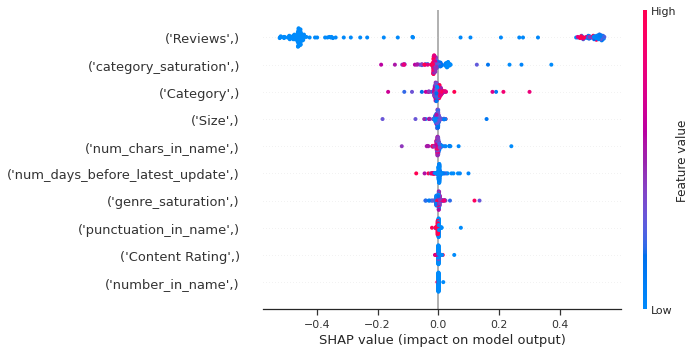

In [ ]:
shap.summary_plot(random_forest2_shap_values, X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = random_forest2
thismodel_name = "Decision Tree Classifier - Random Forest"

# fit
thismodel.fit(X_train, y_train)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

random_forest2_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

random_forest2_f1

Decision Tree Classifier - Random Forest
train f1 score                                   0.945398
test f1 score                                    0.837838
train_test diff                                  0.107560
accuracy                                         0.853659
precision                                        0.729412
recall                                           0.984127

##Decision Trees with AdaBoost

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.064, n_estimators=50, random_state=424)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0.097 seconds
 Testing Time: 0.011 seconds
---------------------------------------------
Train Accuracy:  0.8849693251533742
 Test Accuracy:  0.8353658536585366
---------------------------------------------
Train F1 Score:  0.8811410459587956
 Test F1 Score:  0.8137931034482759

---------------------------------------------
 Area Under ROC (test):  0.9633655994043188
---------------------------------------------
Model Memory Size: 33.27 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

 Non-Popular       0.75      0.99      0.85        79
     Popular       0

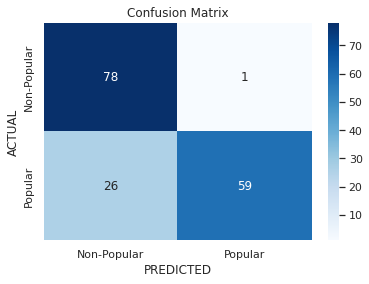


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


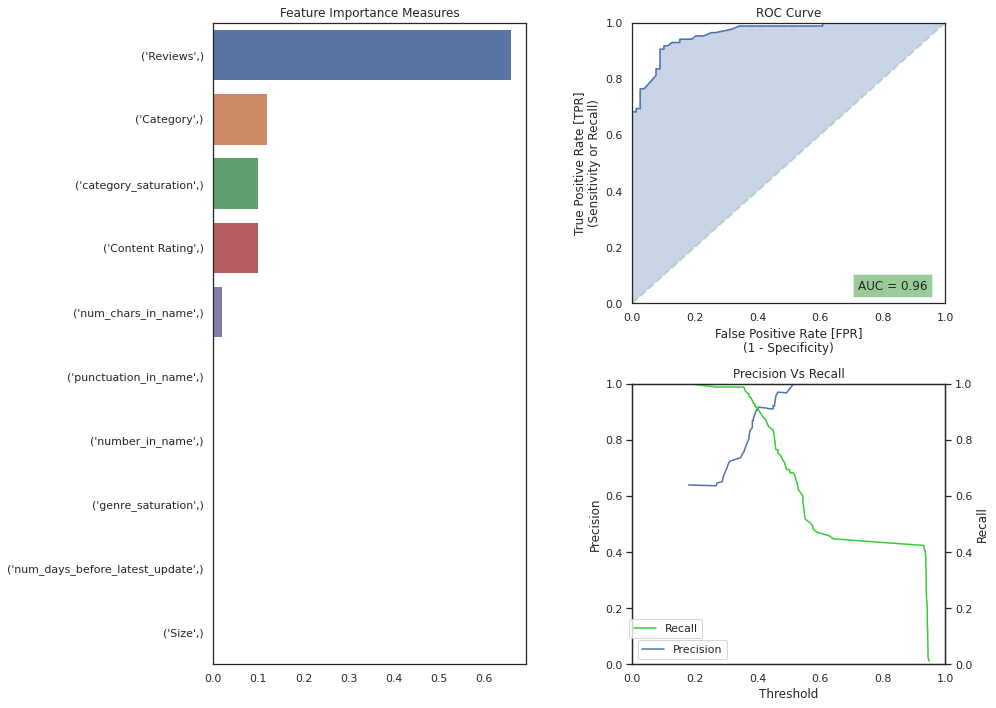

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#Not sure what to choose for this n_estimators versus learning_rate, documentation says there is a tradeoff
adaboot = AdaBoostClassifier(n_estimators=50, learning_rate=0.064,
                             random_state=seed_val)

adaboot, adaboot_report = report(adaboot, X_train, y_train,
                                 X_test, y_test,
                                 display_scores=[primary_eval_metric],
                                 importance_plot=True,
                                 feature_labels=feature_names,
                                 confusion_labels=confusion_lbs)

In [ ]:
# ADA Boost - SHAP Attempt
explainer = shap.KernelExplainer(adaboot.predict, X_train)
adaboot_shap_values = explainer.shap_values(X_test)

Using 652 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/164 [00:00<?, ?it/s]

In [ ]:
shap.summary_plot(adaboot_shap_values, X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = adaboot
thismodel_name = "Decision Tree Classifier - ADABoost"

# fit
thismodel.fit(X_train, y_train)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

adaboot_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

adaboot_f1

Decision Tree Classifier - ADABoost
train f1 score                              0.881141
test f1 score                               0.813793
train_test diff                             0.067348
accuracy                                    0.835366
precision                                   0.694118
recall                                      0.983333

##Linear SVC

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=424, shrinking=True, tol=0.001,
    verbose=False)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0.057 seconds
 Testing Time: 0.002 seconds
---------------------------------------------
Train Accuracy:  0.6641104294478528
 Test Accuracy:  0.6341463414634146
---------------------------------------------
Train F1 Score:  0.671664167916042
 Test F1 Score:  0.6428571428571428

---------------------------------------------
 Area Under ROC (test):  0.6610573343261354
---------------------------------------------
Model Memory Size: 51.93 kB

=============================> CLASSIFICATION REPORT <===================================
         


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


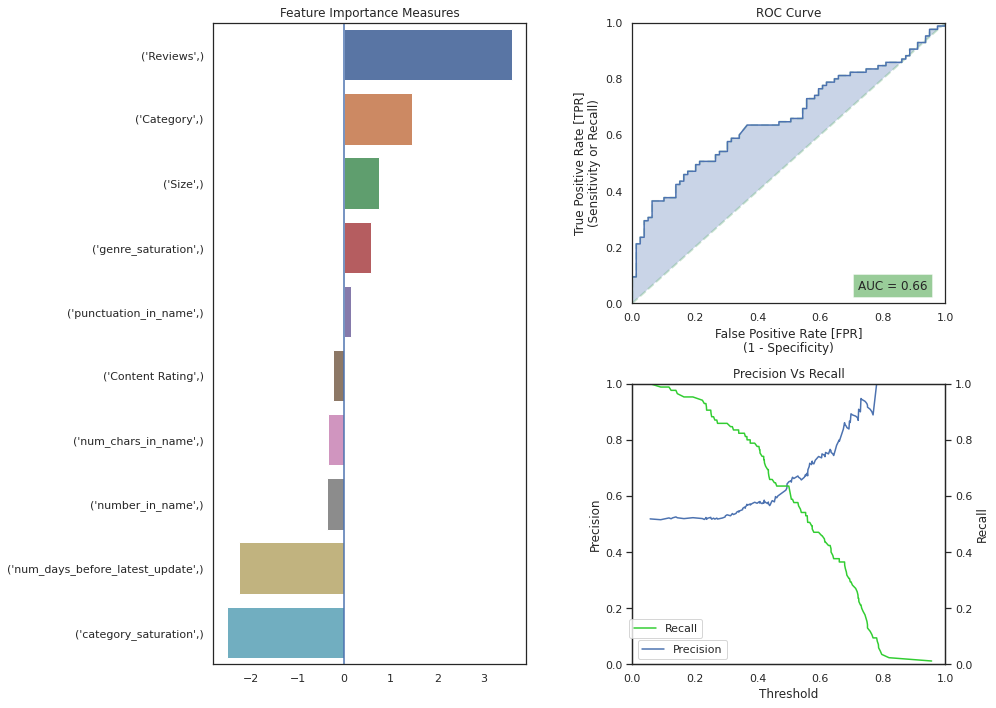

In [ ]:
from sklearn.svm import SVC

linear_svc = SVC(#C=2.1, 
                 kernel='linear', 
                 probability=True,
                 class_weight='balanced', random_state=seed_val)

linear_svc, linear_svc_report = report(linear_svc, X_train, y_train,
                                       X_test, y_test,
                                       display_scores=[primary_eval_metric],
                                       importance_plot=True,
                                       feature_labels=feature_names,
                                       confusion_labels=confusion_lbs)

In [ ]:
# SVC - SHAP Attempt
explainer = shap.LinearExplainer(linear_svc, X_train)
linear_svc_shap_values = explainer.shap_values(X_test)

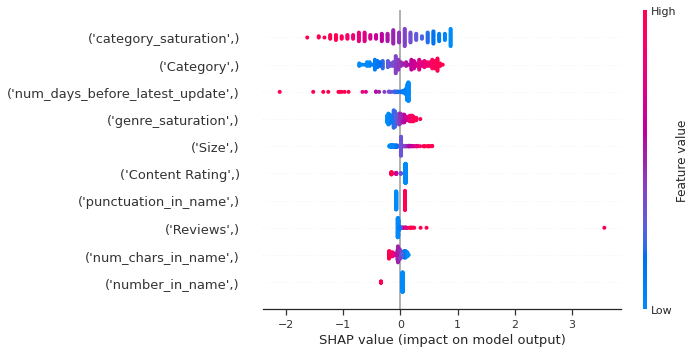

In [ ]:
shap.summary_plot(linear_svc_shap_values, X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = linear_svc
thismodel_name = "Support Vector Classification - Linear"

# fit
thismodel.fit(X_train, y_train)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

linear_svc_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

linear_svc_f1

Support Vector Classification - Linear
train f1 score                                 0.671664
test f1 score                                  0.642857
train_test diff                                0.028807
accuracy                                       0.634146
precision                                      0.635294
recall                                         0.650602

##SVM (Linear, Poly & Sigmoid)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0 seconds
 Testing Time: 0.002 seconds
---------------------------------------------
Train Accuracy:  0.6702453987730062
 Test Accuracy:  0.6402439024390244
---------------------------------------------
Train F1 Score:  0.6757164404223227
 Test F1 Score:  0.6467065868263472

---------------------------------------------
 Area Under ROC (test):  0.6609828741623232
---------------------------------------------
Model Memory Size: 52.11 kB

=============================> CLASSIFICATION REPORT <===================================
              pre


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


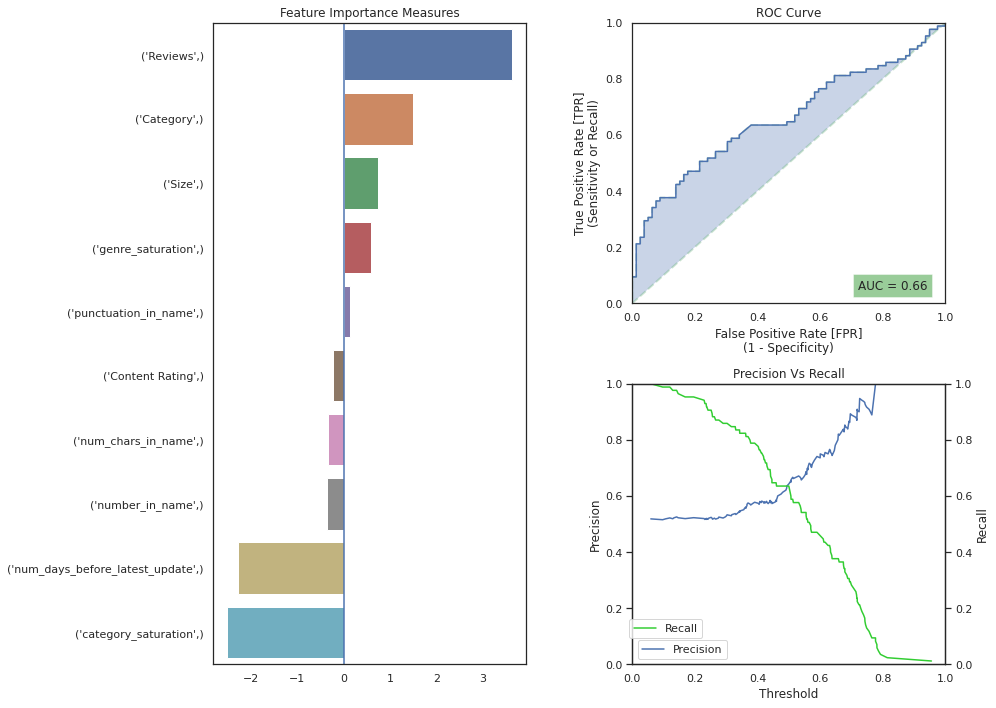

In [ ]:
#Import svm model

from sklearn import svm

#Create a svm Classifier
linearclf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
linearclf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_linear = linearclf.predict(X_test)

linearclf, linearclf_report = report(linearclf, X_train, y_train,
                                       X_test, y_test,
                                       display_scores=[primary_eval_metric],
                                       importance_plot=True,
                                       feature_labels=feature_names,
                                       confusion_labels=confusion_lbs)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = linearclf
thismodel_name = "Support Vector Machine - Linear"

# fit
thismodel.fit(X_train, y_train)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

linearclf_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

linearclf_f1

Support Vector Machine - Linear
train f1 score                          0.675716
test f1 score                           0.646707
train_test diff                         0.029010
accuracy                                0.640244
precision                               0.635294
recall                                  0.658537

In [ ]:
svm_linear_explainer = shap.KernelExplainer(linearclf.predict, X_test)
svm_linear_shap_values = svm_linear_explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(svm_linear_shap_values, X_test)

In [ ]:
# degree parameter is the degree of the polynomial used to find the hyperplane to split the data
# degree value controls the flexibility of the decision boundary, higher value means more flexible
# degrees 2, 3 and 4 produced the best scores, but I chose 4 as it has the highest accuracy, recall and F1 scores
# from degree 5 onwards the results worsen
# For instance, with two features A and B, a polynomial of degree 2 would produce 6 features: 1 (any feature to power 0), A, B, A², B², and AB

polyclf = svm.SVC(kernel='poly', degree = 4, probability=True)
polyclf.fit(X_train, y_train)    
y_pred_poly = polyclf.predict(X_test)

polyclf, polyclf_report = report(polyclf, X_train, y_train,
                                       X_test, y_test,
                                       display_scores=[primary_eval_metric],
                                       importance_plot=True,
                                       feature_labels=feature_names,
                                       confusion_labels=confusion_lbs)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0 seconds
 Testing Time: 0.002 seconds
---------------------------------------------
Train Accuracy:  0.7561349693251533
 Test Accuracy:  0.6341463414634146
---------------------------------------------
Train F1 Score:  0.7135135135135134
 Test F1 Score:  0.5588235294117647

---------------------------------------------
 Area Under ROC (test):  0.709084139985108
---------------------------------------------
Model Memory Size: 47.42 kB

=============================> CLASSIFICATION REPORT <===================================
              precis


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = polyclf
thismodel_name = "Support Vector Machine - Poly"

# fit
thismodel.fit(X_train, y_train)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

polyclf_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

polyclf_f1

Support Vector Machine - Poly
train f1 score                        0.713514
test f1 score                         0.558824
train_test diff                       0.154690
accuracy                              0.634146
precision                             0.447059
recall                                0.745098

In [ ]:
svm_polynomial_explainer = shap.KernelExplainer(polyclf.predict, X_test)
svm_polynomial_shap_values = svm_polynomial_explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(svm_polynomial_shap_values, X_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0 seconds
 Testing Time: 0.004 seconds
---------------------------------------------
Train Accuracy:  0.5444785276073619
 Test Accuracy:  0.5792682926829268
---------------------------------------------
Train F1 Score:  0.5381026438569207
 Test F1 Score:  0.601156069364162

---------------------------------------------
 Area Under ROC (test):  0.585331347728965
---------------------------------------------
Model Memory Size: 41.57 kB

=============================> CLASSIFICATION REPORT <===================================
              prec


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


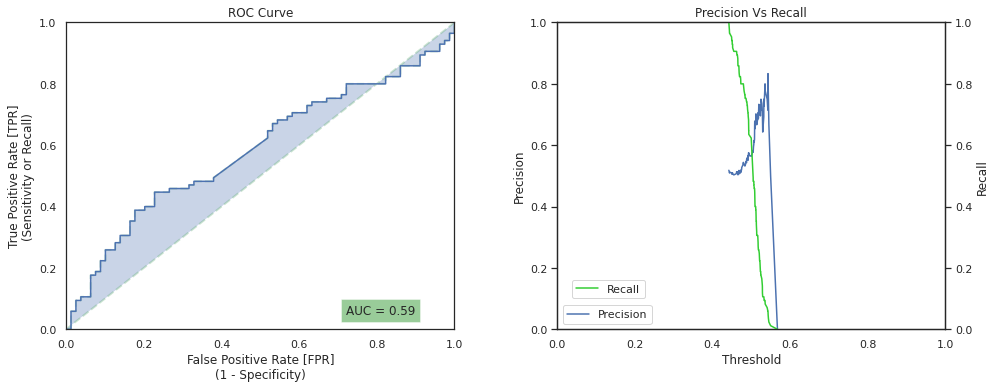

In [ ]:
sigmoidclf = svm.SVC(kernel='sigmoid', probability=True)
sigmoidclf.fit(X_train, y_train)
y_pred_sigmoid = sigmoidclf.predict(X_test)

sigmoidclf, sigmoidclf_report = report(sigmoidclf, X_train, y_train,
                                       X_test, y_test,
                                       display_scores=[primary_eval_metric],
                                       importance_plot=True,
                                       feature_labels=feature_names,
                                       confusion_labels=confusion_lbs)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = sigmoidclf
thismodel_name = "Support Vector Machine - Sigmoid"

# fit
thismodel.fit(X_train, y_train)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

sigmoidclf_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

sigmoidclf_f1

Support Vector Machine - Sigmoid
train f1 score                           0.538103
test f1 score                            0.601156
train_test diff                         -0.063053
accuracy                                 0.579268
precision                                0.611765
recall                                   0.590909

In [ ]:
svm_sigmoid_explainer = shap.KernelExplainer(sigmoidclf.predict, X_test)
svm_sigmoid_shap_values = svm_sigmoid_explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(svm_sigmoid_shap_values, X_test)

##SVM with RBF kernel

SVC(C=0.25, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=True, random_state=424,
    shrinking=True, tol=0.001, verbose=False)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0.113 seconds
 Testing Time: 0.004 seconds
---------------------------------------------
Train Accuracy:  0.6901840490797546
 Test Accuracy:  0.6158536585365854
---------------------------------------------
Train F1 Score:  0.6823899371069183
 Test F1 Score:  0.6181818181818182

---------------------------------------------
 Area Under ROC (test):  0.6707371556217423
---------------------------------------------
Model Memory Size: 57.01 kB

=============================> CLASSIFICATION REPORT <===================================
          

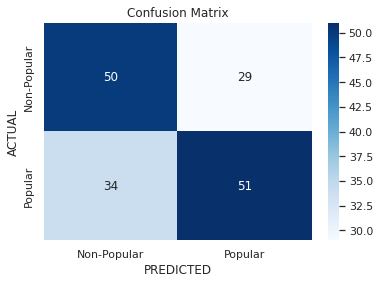


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


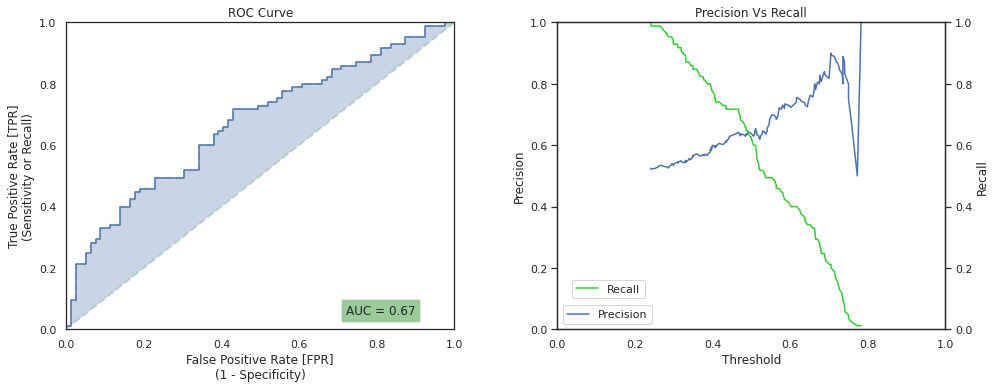

In [ ]:
from sklearn import svm

rbf_svc = svm.SVC(C=0.25, kernel='rbf', probability=True,
              class_weight='balanced', random_state=seed_val)

rbf_svc, rbf_svc_report = report(rbf_svc, X_train, y_train,
                                 X_test, y_test,
                                 display_scores=[primary_eval_metric],
                                 importance_plot=True,
                                 feature_labels=feature_names,
                                 confusion_labels=confusion_lbs)

In [ ]:
# RBF - SHAP Attempt
explainer = shap.KernelExplainer(rbf_svc.predict, X_train)
rbf_svc_shap_values = explainer.shap_values(X_test)

Using 652 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/164 [00:00<?, ?it/s]

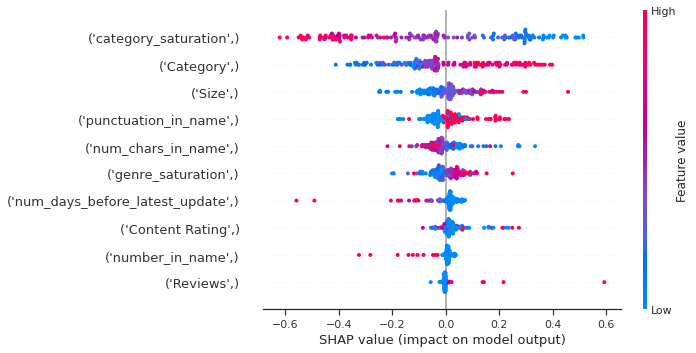

In [ ]:
shap.summary_plot(rbf_svc_shap_values, X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = rbf_svc
thismodel_name = "Support Vector Machine - RBF"

# fit
thismodel.fit(X_train, y_train)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

rbf_svc_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

rbf_svc_f1

Support Vector Machine - RBF
train f1 score                       0.682390
test f1 score                        0.618182
train_test diff                      0.064208
accuracy                             0.615854
precision                            0.600000
recall                               0.637500

##CatBoost

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 27 kB/s 



=============================> TRAIN-TEST DETAILS <======================================
Train Size: 652 samples
 Test Size: 164 samples
---------------------------------------------
Training Time: 0 seconds
 Testing Time: 0.002 seconds
---------------------------------------------
Train Accuracy:  0.9723926380368099
 Test Accuracy:  0.8353658536585366
---------------------------------------------
Train F1 Score:  0.9717868338557994
 Test F1 Score:  0.8211920529801323

---------------------------------------------
 Area Under ROC (test):  0.9545793000744601
---------------------------------------------
Model Memory Size: 215.58 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

 Non-Popular       0.77      0.95      0.85        79
     Popular       0.94      0.73      0.82        85

    accuracy                           0.84       164
   macro avg       0.85      0.84      0.83       

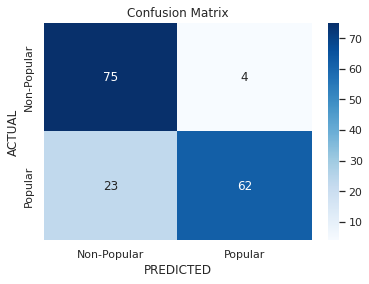


=======================================> PLOTS <=========================================


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


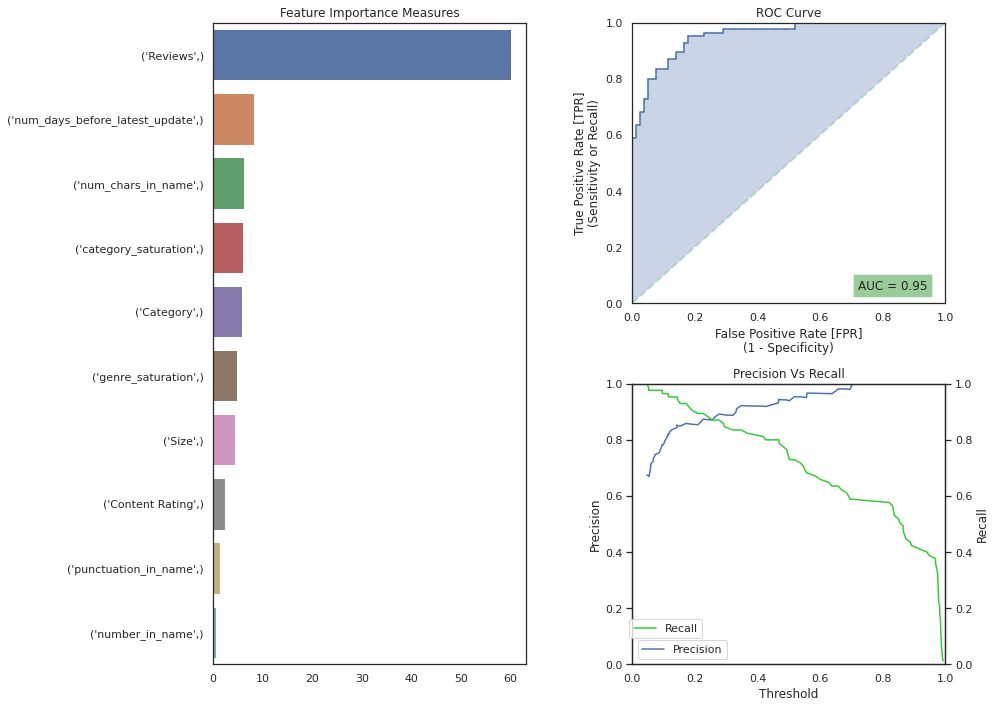

In [ ]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier(l2_leaf_reg=120, depth=6,
                                  auto_class_weights='Balanced',
                                  iterations=200, learning_rate=0.16,
                                  use_best_model=True,
                                  early_stopping_rounds=150,
                                  eval_metric='F1', random_state=seed_val)

catboost_clf.fit(X_train, y_train, 
                 eval_set=(X_train, y_train),
                 verbose=False)

catboost_clf, catboost_report = report(catboost_clf, X_train, y_train,
                                       X_test, y_test,
                                       display_scores=[primary_eval_metric],
                                       importance_plot=True,
                                       feature_labels=feature_names,
                                       confusion_labels=confusion_lbs)

In [ ]:
# CatBoost - SHAP Attempt
explainer = shap.TreeExplainer(catboost_clf, X_train)
catboost_clf_shap_values = explainer.shap_values(X_test)

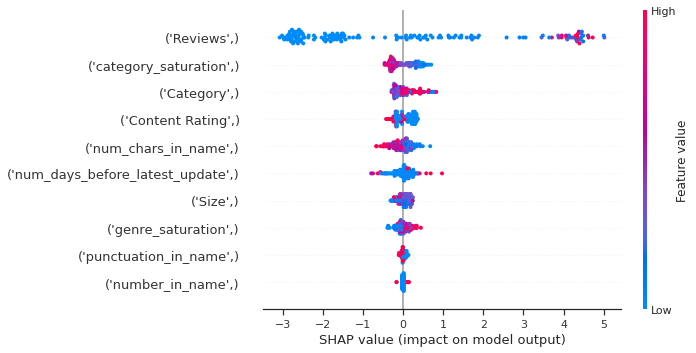

In [ ]:
shap.summary_plot(catboost_clf_shap_values, X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thismodel = catboost_clf
thismodel_name = "Decision Tree Classifier - CatBoost"

# fit (specific for catboost)
thismodel.fit(X_train, y_train, 
                 eval_set=(X_train, y_train),
                 verbose=False)

# predict
y_pred_1 = thismodel.predict(X_train)

# train f1 score
trainf1 = f1_score(y_pred_1, y_train)

# predict
y_pred_2 = thismodel.predict(X_test)

# test f1 score
testf1 = f1_score(y_pred_2, y_test)

acc = accuracy_score(y_pred_2, y_test)

prec = precision_score(y_pred_2, y_test)

rec = recall_score(y_pred_2, y_test)

lst = [trainf1, testf1, trainf1 - testf1, acc, prec, rec]

rows = ['train f1 score','test f1 score', 'train_test diff', 
        'accuracy', 'precision', 'recall']

catboost_clf_f1 = pd.DataFrame(lst,index=rows,columns=[thismodel_name])

catboost_clf_f1

Decision Tree Classifier - CatBoost
train f1 score                              0.971787
test f1 score                               0.821192
train_test diff                             0.150595
accuracy                                    0.835366
precision                                   0.729412
recall                                      0.939394

# Model Comparison

## Confusion Matrix Comparison

In [ ]:
# For all the Train F1, Test F1 and differences
from functools import reduce
f1_list = [
          nb_f1,
          logit_f1,
          knn_f1,
          decision_tree2_f1,
          bagging_clf_f1,
          random_forest2_f1,
          adaboot_f1,
          linear_svc_f1,
          linearclf_f1,
          polyclf_f1,
          sigmoidclf_f1,
          rbf_svc_f1,
          catboost_clf_f1,
          ]

#merge various f1 score tables
final_f1 = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True), f1_list)

final_f1

Naive Bayes Classifier  Logistic Regression  K-NN Classifier  \
train f1 score                 0.819788             0.667697         1.000000   
test f1 score                  0.671875             0.621118         0.685083   
train_test diff                0.147913             0.046579         0.314917   
accuracy                       0.743902             0.628049         0.652439   
precision                      0.505882             0.588235         0.729412   
recall                         1.000000             0.657895         0.645833   

                 Decision Tree Classifier  Decision Tree Classifier - Bagging  \
train f1 score                   0.884615                            0.890625   
test f1 score                    0.789116                            0.813793   
train_test diff                  0.095500                            0.076832   
accuracy                         0.810976                            0.835366   
precision                        0.682353                            0.694118   
recall                           0.935484                            0.983333   

                 Decision Tree Classifier - Random Forest  \
train f1 score                                   0.945398   
test f1 score                                    0.837838   
train_test diff                                  0.107560   
accuracy                                         0.853659   
precision                                        0.729412   
recall                                           0.984127   

                 Decision Tree Classifier - ADABoost  \
train f1 score                              0.881141   
test f1 score                               0.813793   
train_test diff                             0.067348   
accuracy                                    0.835366   
precision                                   0.694118   
recall                                      0.983333   

                 Support Vector Classification - Linear  \
train f1 score                                 0.671664   
test f1 score                                  0.642857   
train_test diff                                0.028807   
accuracy                                       0.634146   
precision                                      0.635294   
recall                                         0.650602   

                 Support Vector Machine - Linear  \
train f1 score                          0.675716   
test f1 score                           0.646707   
train_test diff                         0.029010   
accuracy                                0.640244   
precision                               0.635294   
recall                                  0.658537   

                 Support Vector Machine - Poly  \
train f1 score                        0.713514   
test f1 score                         0.558824   
train_test diff                       0.154690   
accuracy                              0.634146   
precision                             0.447059   
recall                                0.745098   

                 Support Vector Machine - Sigmoid  \
train f1 score                           0.538103   
test f1 score                            0.601156   
train_test diff                         -0.063053   
accuracy                                 0.579268   
precision                                0.611765   
recall                                   0.590909   

                 Support Vector Machine - RBF  \
train f1 score                       0.682390   
test f1 score                        0.618182   
train_test diff                      0.064208   
accuracy                             0.615854   
precision                            0.600000   
recall                               0.637500   

                 Decision Tree Classifier - CatBoost  
train f1 score                              0.971787  
test f1 score                               0.821192  
train_test diff                             0.150

In [ ]:
#Option 2 for f1 score table
final_f1_T = final_f1.T

final_f1_T.sort_values("test f1 score", ascending=False, inplace=True)

final_f1_T

train f1 score  test f1 score  \
Decision Tree Classifier - Random Forest        0.945398       0.837838   
Decision Tree Classifier - CatBoost             0.971787       0.821192   
Decision Tree Classifier - Bagging              0.890625       0.813793   
Decision Tree Classifier - ADABoost             0.881141       0.813793   
Decision Tree Classifier                        0.884615       0.789116   
K-NN Classifier                                 1.000000       0.685083   
Naive Bayes Classifier                          0.819788       0.671875   
Support Vector Machine - Linear                 0.675716       0.646707   
Support Vector Classification - Linear          0.671664       0.642857   
Logistic Regression                             0.667697       0.621118   
Support Vector Machine - RBF                    0.682390       0.618182   
Support Vector Machine - Sigmoid                0.538103       0.601156   
Support Vector Machine - Poly                   0.713514       0.558824   

                                          train_test diff  accuracy  \
Decision Tree Classifier - Random Forest         0.107560  0.853659   
Decision Tree Classifier - CatBoost              0.150595  0.835366   
Decision Tree Classifier - Bagging               0.076832  0.835366   
Decision Tree Classifier - ADABoost              0.067348  0.835366   
Decision Tree Classifier                         0.095500  0.810976   
K-NN Classifier                                  0.314917  0.652439   
Naive Bayes Classifier                           0.147913  0.743902   
Support Vector Machine - Linear                  0.029010  0.640244   
Support Vector Classification - Linear           0.028807  0.634146   
Logistic Regression                              0.046579  0.628049   
Support Vector Machine - RBF                     0.064208  0.615854   
Support Vector Machine - Sigmoid                -0.063053  0.579268   
Support Vector Machine - Poly                    0.154690  0.634146   

                                          precision    recall  
Decision Tree Classifier - Random Forest   0.729412  0.984127  
Decision Tree Classifier - CatBoost        0.729412  0.939394  
Decision Tree Classifier - Bagging         0.694118  0.983333  
Decision Tree Classifier - ADABoost        0.694118  0.983333  
Decision Tree Classifier                   0.682353  0.935484  
K-NN Classifier                            0.729412  0.645833  
Naive Bayes Classifier                     0.505882  1.000000  
Support Vector Machine - Linear            0.635294  0.658537  
Support Vector Classification - Linear     0.635294  0.650602  
Logistic Regression                        0.588235  0.657895  
Support Vector Machine - RBF               0.600000  0.637500  
Support Vector Machine - Sigmoid           0.611765  0.590909  
Support Vector Machine - Poly              0.447059  0.745098

## Report Comparison

In [ ]:
report_list = [nb_report, 
               logit_report, 
               knn_report, 
               decision_tree_report2,               
               bagging_clf_report, 
               random_forest_report2, 
               adaboot_report,
               catboost_report,
               linear_svc_report, 
               linearclf_report,
               polyclf_report,
               sigmoidclf_report,
               rbf_svc_report]
clf_labels = [rep['clf'].__class__.__name__ for rep in report_list]
clf_labels[-5] = 'Linear SVC'
clf_labels[-4] = 'Linear SVM'
clf_labels[-3] = 'Poly SVM'
clf_labels[-2] = 'Sigmoid SVM'
clf_labels[-1] = 'RBF SVC'

In [ ]:
compare_table, compare_plot = compare_models(y_test, clf_reports=report_list,
                                             labels=clf_labels,
                                             score=primary_eval_metric.__name__)

# compare_table.sort_values(by=['Overfitting', 'F1-score'], ascending=[True, False])

# Display model comparison table, sorted by highes test f1-score
compare_table[["Train f1_score","Test f1_score","Accuracy","ROC Area","Precision","Recall"]].sort_values(by=['Test f1_score'], ascending=False)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argumen

Train f1_score Test f1_score  Accuracy  ROC Area  \
RandomForestClassifier          0.925          0.83  0.847561  0.954579   
CatBoostClassifier              0.972         0.821  0.835366  0.954579   
BaggingClassifier               0.891         0.814  0.835366  0.931794   
AdaBoostClassifier              0.881         0.814  0.835366  0.963366   
DecisionTreeClassifier          0.885         0.789  0.810976  0.914966   
KNeighborsClassifier                1         0.685  0.652439  0.688086   
GaussianNB                       0.82         0.672  0.743902   0.83857   
Linear SVM                      0.676         0.647  0.640244  0.661281   
Linear SVC                      0.672         0.643  0.634146  0.661057   
LogisticRegression              0.668         0.621  0.628049  0.658377   
RBF SVC                         0.682         0.618  0.615854  0.670737   
Sigmoid SVM                     0.538         0.601  0.579268  0.587342   
Poly SVM                        0.714         0.559  0.634146  0.709159   

                       Precision    Recall  
RandomForestClassifier  0.983871  0.717647  
CatBoostClassifier      0.939394  0.729412  
BaggingClassifier       0.983333  0.694118  
AdaBoostClassifier      0.983333  0.694118  
DecisionTreeClassifier  0.935484  0.682353  
KNeighborsClassifier    0.645833  0.729412  
GaussianNB                     1  0.505882  
Linear SVM              0.658537  0.635294  
Linear SVC              0.650602  0.635294  
LogisticRegression      0.657895  0.588235  
RBF SVC                   0.6375       0.6  
Sigmoid SVM             0.590909  0.611765  
Poly SVM                0.745098  0.447059

In [ ]:
compare_plot.set_size_inches(18.5, 10.5, forward=True)
compare_plot